In this project, I read the following kernels: <br>
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python <br>
https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset <br>
https://www.kaggle.com/apapiu/regularized-linear-models <br>
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

## Import python Analysis tools and read the data from CSV.

In [1]:
from sklearn import preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import tarfile 
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from sklearn import linear_model as lm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import chi2, f_regression
import xgboost as xgb
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
import statsmodels.api as sm

In [2]:
train = pd.read_csv("/Users/rileychiu/Desktop/Kaggle/house price/train.csv")
test = pd.read_csv("/Users/rileychiu/Desktop/Kaggle/house price/test.csv")
sample = pd.read_csv('/Users/rileychiu/Desktop/Kaggle/house price/sample_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see that there are 1460 examples in the train set.

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

We can see that there are 1459 examples in the test set.

There are 80 features. (data field)

## Data field

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>
MSSubClass: The building class<br>
MSZoning: The general zoning classification<br>
LotFrontage: Linear feet of street connected to property<br>
LotArea: Lot size in square feet<br>
Street: Type of road access<br>
Alley: Type of alley access<br>
LotShape: General shape of property<br>
LandContour: Flatness of the property<br>
Utilities: Type of utilities available<br>
LotConfig: Lot configuration<br>
LandSlope: Slope of property<br>
Neighborhood: Physical locations within Ames city limits<br>
Condition1: Proximity to main road or railroad<br>
Condition2: Proximity to main road or railroad (if a second is present)<br>
BldgType: Type of dwelling<br>
HouseStyle: Style of dwelling<br>
OverallQual: Overall material and finish quality<br>
OverallCond: Overall condition rating<br>
YearBuilt: Original construction date<br>
YearRemodAdd: Remodel date<br>
RoofStyle: Type of roof<br>
RoofMatl: Roof material<br>
Exterior1st: Exterior covering on house<br>
Exterior2nd: Exterior covering on house (if more than one material)<br>
MasVnrType: Masonry veneer type<br>
MasVnrArea: Masonry veneer area in square feet<br>
ExterQual: Exterior material quality<br>
ExterCond: Present condition of the material on the exterior<br>
Foundation: Type of foundation<br>
BsmtQual: Height of the basement<br>
BsmtCond: General condition of the basement<br>
BsmtExposure: Walkout or garden level basement walls<br>
BsmtFinType1: Quality of basement finished area<br>
BsmtFinSF1: Type 1 finished square feet<br>
BsmtFinType2: Quality of second finished area (if present)<br>
BsmtFinSF2: Type 2 finished square feet<br>
BsmtUnfSF: Unfinished square feet of basement area<br>
TotalBsmtSF: Total square feet of basement area<br>
Heating: Type of heating<br>
HeatingQC: Heating quality and condition<br>
CentralAir: Central air conditioning<br>
Electrical: Electrical system<br>
1stFlrSF: First Floor square feet<br>
2ndFlrSF: Second floor square feet<br>
LowQualFinSF: Low quality finished square feet (all floors)<br>
GrLivArea: Above grade (ground) living area square feet<br>
BsmtFullBath: Basement full bathrooms<br>
BsmtHalfBath: Basement half bathrooms<br>
FullBath: Full bathrooms above grade<br>
HalfBath: Half baths above grade<br>
Bedroom: Number of bedrooms above basement level<br>
Kitchen: Number of kitchens<br>
KitchenQual: Kitchen quality<br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>
Functional: Home functionality rating<br>
Fireplaces: Number of fireplaces<br>
FireplaceQu: Fireplace quality<br>
GarageType: Garage location<br>
GarageYrBlt: Year garage was built<br>
GarageFinish: Interior finish of the garage<br>
GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet<br>
GarageQual: Garage quality<br>
GarageCond: Garage condition<br>
PavedDrive: Paved driveway<br>
WoodDeckSF: Wood deck area in square feet<br>
OpenPorchSF: Open porch area in square feet<br>
EnclosedPorch: Enclosed porch area in square feet<br>
3SsnPorch: Three season porch area in square feet<br>
ScreenPorch: Screen porch area in square feet<br>
PoolArea: Pool area in square feet<br>
PoolQC: Pool quality<br>
Fence: Fence quality<br>
MiscFeature: Miscellaneous feature not covered in other categories<br>
MiscVal: $Value of miscellaneous feature<br>
MoSold: Month Sold<br>
YrSold: Year Sold<br>
SaleType: Type of sale<br>
SaleCondition: Condition of sale<br>

In [5]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Get the first sense of the data.

In [6]:
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Check and remove the outlier.

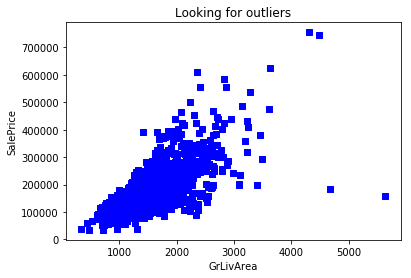

In [7]:
plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

train = train[train.GrLivArea < 4500]

Text(0.5, 1.0, 'SalePrice distribution')

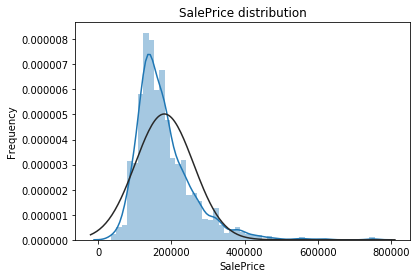

In [8]:
sns.distplot(train['SalePrice'] , fit=norm);

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')


To make the SalePrice have normal distribution. We use the numpy fuction log1p which  applies log(1+x) to all elements of the column. Don't forget to transform back after getting the prediction.

In [9]:
train["SalePrice"] = np.log1p(train["SalePrice"])

Text(0.5, 1.0, 'SalePrice distribution')

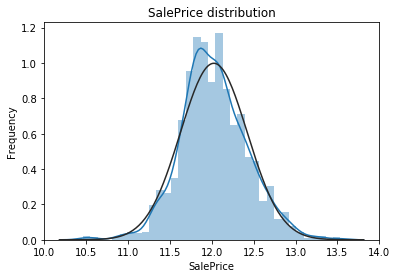

In [10]:
#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

Combine train and test for data processing.

In [11]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
#all_data.drop(['SalePrice'], axis=1, inplace=True)

## Feature Engineering

Imputing missing values.

In [12]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
all_data.loc[:, "Alley"] = all_data.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
all_data.loc[:, "BedroomAbvGr"] = all_data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
all_data.loc[:, "BsmtQual"] = all_data.loc[:, "BsmtQual"].fillna("No")
all_data.loc[:, "BsmtCond"] = all_data.loc[:, "BsmtCond"].fillna("No")
all_data.loc[:, "BsmtExposure"] = all_data.loc[:, "BsmtExposure"].fillna("No")
all_data.loc[:, "BsmtFinType1"] = all_data.loc[:, "BsmtFinType1"].fillna("No")
all_data.loc[:, "BsmtFinType2"] = all_data.loc[:, "BsmtFinType2"].fillna("No")
all_data.loc[:, "BsmtFullBath"] = all_data.loc[:, "BsmtFullBath"].fillna(0)
all_data.loc[:, "BsmtHalfBath"] = all_data.loc[:, "BsmtHalfBath"].fillna(0)
all_data.loc[:, "BsmtUnfSF"] = all_data.loc[:, "BsmtUnfSF"].fillna(0)
all_data.loc[:, "BsmtFinSF1"] = all_data.loc[:, "BsmtFinSF1"].fillna(0)
all_data.loc[:, "BsmtFinSF2"] = all_data.loc[:, "BsmtFinSF2"].fillna(0)
# CentralAir : NA most likely means No
all_data.loc[:, "CentralAir"] = all_data.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
all_data.loc[:, "Condition1"] = all_data.loc[:, "Condition1"].fillna("Norm")
all_data.loc[:, "Condition2"] = all_data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
all_data.loc[:, "EnclosedPorch"] = all_data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
all_data.loc[:, "ExterCond"] = all_data.loc[:, "ExterCond"].fillna("TA")
all_data.loc[:, "ExterQual"] = all_data.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
all_data.loc[:, "Fence"] = all_data.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
all_data.loc[:, "FireplaceQu"] = all_data.loc[:, "FireplaceQu"].fillna("No")
all_data.loc[:, "Fireplaces"] = all_data.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
all_data.loc[:, "Functional"] = all_data.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
all_data.loc[:, "GarageType"] = all_data.loc[:, "GarageType"].fillna("No")
all_data.loc[:, "GarageFinish"] = all_data.loc[:, "GarageFinish"].fillna("No")
all_data.loc[:, "GarageQual"] = all_data.loc[:, "GarageQual"].fillna("No")
all_data.loc[:, "GarageCond"] = all_data.loc[:, "GarageCond"].fillna("No")
all_data.loc[:, "GarageArea"] = all_data.loc[:, "GarageArea"].fillna(0)
all_data.loc[:, "GarageCars"] = all_data.loc[:, "GarageCars"].fillna(0)
all_data.loc[:, "GarageYrBlt"] = all_data.loc[:, "GarageYrBlt"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
all_data.loc[:, "HalfBath"] = all_data.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
all_data.loc[:, "HeatingQC"] = all_data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
all_data.loc[:, "KitchenAbvGr"] = all_data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
all_data.loc[:, "KitchenQual"] = all_data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
all_data.loc[:, "LotFrontage"] = all_data.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
all_data.loc[:, "LotShape"] = all_data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
all_data.loc[:, "MasVnrType"] = all_data.loc[:, "MasVnrType"].fillna("None")
all_data.loc[:, "MasVnrArea"] = all_data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
all_data.loc[:, "MiscFeature"] = all_data.loc[:, "MiscFeature"].fillna("No")
all_data.loc[:, "MiscVal"] = all_data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
all_data.loc[:, "OpenPorchSF"] = all_data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
all_data.loc[:, "PavedDrive"] = all_data.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
all_data.loc[:, "PoolQC"] = all_data.loc[:, "PoolQC"].fillna("No")
all_data.loc[:, "PoolArea"] = all_data.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
all_data.loc[:, "SaleCondition"] = all_data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
all_data.loc[:, "ScreenPorch"] = all_data.loc[:, "ScreenPorch"].fillna(0)
# TotalBsmtSF : NA most likely means no Bsmt
all_data.loc[:, "TotalBsmtSF"] = all_data.loc[:, "TotalBsmtSF"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
all_data.loc[:, "TotRmsAbvGrd"] = all_data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
all_data.loc[:, "Utilities"] = all_data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
all_data.loc[:, "WoodDeckSF"] = all_data.loc[:, "WoodDeckSF"].fillna(0)

Transforming some numerical variables that are actually categorical

In [13]:
all_data.drop(["MSSubClass"], axis=1, inplace=True)
all_data = all_data.replace({"MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

Encode some categorical features as ordered numbers when there is information in the order

In [14]:
all_data = all_data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

Simplifications of existing features (prevent overfitting)

In [15]:

all_data["SimplOverallQual"] = all_data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
all_data["SimplOverallCond"] = all_data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
all_data["SimplPoolQC"] = all_data.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
all_data["SimplGarageCond"] = all_data.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
all_data["SimplGarageQual"] = all_data.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_data["SimplFireplaceQu"] = all_data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_data["SimplFunctional"] = all_data.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
all_data["SimplKitchenQual"] = all_data.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
all_data["SimplHeatingQC"] = all_data.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data["SimplBsmtFinType1"] = all_data.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_data["SimplBsmtFinType2"] = all_data.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
all_data["SimplBsmtCond"] = all_data.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data["SimplBsmtQual"] = all_data.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
all_data["SimplExterCond"] = all_data.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
all_data["SimplExterQual"] = all_data.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })


Combinations of existing features

In [16]:
# 2* Combinations of existing features
# Overall quality of the house
all_data["OverallGrade"] = all_data["OverallQual"] * all_data["OverallCond"]
# Overall quality of the garage
all_data["GarageGrade"] = all_data["GarageQual"] * all_data["GarageCond"]
# Overall quality of the exterior
all_data["ExterGrade"] = all_data["ExterQual"] * all_data["ExterCond"]
# Overall kitchen score
all_data["KitchenScore"] = all_data["KitchenAbvGr"] * all_data["KitchenQual"]
# Overall fireplace score
all_data["FireplaceScore"] = all_data["Fireplaces"] * all_data["FireplaceQu"]
# Overall garage score
all_data["GarageScore"] = all_data["GarageArea"] * all_data["GarageQual"]
# Overall pool score
all_data["PoolScore"] = all_data["PoolArea"] * all_data["PoolQC"]
# Simplified overall quality of the house
all_data["SimplOverallGrade"] = all_data["SimplOverallQual"] * all_data["SimplOverallCond"]
# Simplified overall quality of the exterior
all_data["SimplExterGrade"] = all_data["SimplExterQual"] * all_data["SimplExterCond"]
# Simplified overall pool score
all_data["SimplPoolScore"] = all_data["PoolArea"] * all_data["SimplPoolQC"]
# Simplified overall garage score
all_data["SimplGarageScore"] = all_data["GarageArea"] * all_data["SimplGarageQual"]
# Simplified overall fireplace score
all_data["SimplFireplaceScore"] = all_data["Fireplaces"] * all_data["SimplFireplaceQu"]
# Simplified overall kitchen score
all_data["SimplKitchenScore"] = all_data["KitchenAbvGr"] * all_data["SimplKitchenQual"]
# Total number of bathrooms
all_data["TotalBath"] = all_data["BsmtFullBath"] + (0.5 * all_data["BsmtHalfBath"]) + \
all_data["FullBath"] + (0.5 * all_data["HalfBath"])
# Total SF for house (incl. basement)
all_data["AllSF"] = all_data["GrLivArea"] + all_data["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
all_data["AllFlrsSF"] = all_data["1stFlrSF"] + all_data["2ndFlrSF"]
# Total SF for porch
all_data["AllPorchSF"] = all_data["OpenPorchSF"] + all_data["EnclosedPorch"] + \
all_data["3SsnPorch"] + all_data["ScreenPorch"]
# Has masonry veneer or not
all_data["HasMasVnr"] = all_data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
all_data["BoughtOffPlan"] = all_data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

Skewed features

In [17]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

In [18]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
skewed_features = skewed_features.drop("SalePrice")
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 87 skewed numerical features to Box Cox transform


In [19]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 279)


## Feature selection.

In [20]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [21]:
feature_selection_train = all_data[:ntrain]
feature_selection_test = all_data[ntrain:]

In [22]:
feature_selection_X = feature_selection_train
feature_selection_Y = y_train

Use SelectKBest.

In [23]:
# Create and fit feature_selector
feature_selector = SelectKBest(f_regression, k=140)
feature_selector.fit(feature_selection_X, feature_selection_Y)
cols = feature_selector.get_support(indices=True)
feature_selection_X_new=feature_selection_X.iloc[:,cols]
feature_selection_X_new.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'RoofMatl_WdShngl', 'RoofStyle_Gable', 'RoofStyle_Hip',
       'SaleCondition_Abnorml', 'SaleCondition_Partial', 'SaleType_New',
       'SaleType_WD'],
      dtype='object', length=140)

In [24]:
feature_selection_col=list(feature_selection_X_new.columns)

In [25]:
#put feature_selection_X_new and Saleprice together
feature_selection_X_new["SalePrice"] = feature_selection_Y
feature_selection_XY=feature_selection_X_new

In [26]:
corr = feature_selection_XY.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice                1.000000
AllSF                    0.819024
OverallQual              0.808861
AllFlrsSF                0.745397
GrLivArea                0.738000
SimplOverallQual         0.705830
ExterQual                0.681381
TotalBath                0.677743
KitchenQual              0.664764
GarageCars               0.650260
SimplExterQual           0.635358
OverallGrade             0.618629
1stFlrSF                 0.617721
SimplKitchenQual         0.609207
ExterGrade               0.594875
YearBuilt                0.585230
FullBath                 0.584311
SimplBsmtQual            0.577866
YearRemodAdd             0.565975
SimplOverallGrade        0.544306
TotRmsAbvGrd             0.542421
FireplaceScore           0.541544
FireplaceQu              0.540376
SimplKitchenScore        0.531611
Foundation_PConc         0.531194
SimplFireplaceScore      0.524368
SimplFireplaceQu         0.522636
BsmtQual                 0.520950
SimplExterGrade          0.518441
SimplGarageSco

Lets' look at some examples.

ALLSF is the sum of GrLivArea and TotalBsmtSF. <br>
GrLivArea: Above grade (ground) living area square feet
TotalBsmtSF : Total square feet of basement area

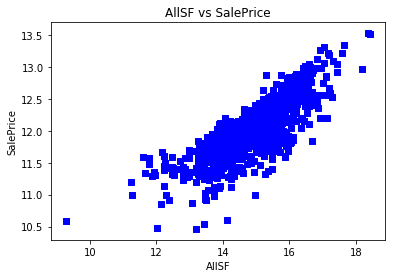

In [27]:
plt.scatter(feature_selection_XY.AllSF, y_train, c = "blue", marker = "s")
plt.title("AllSF vs SalePrice")
plt.xlabel("AllSF")
plt.ylabel("SalePrice")
plt.show()

OverallQual :Overall material and finish quality.

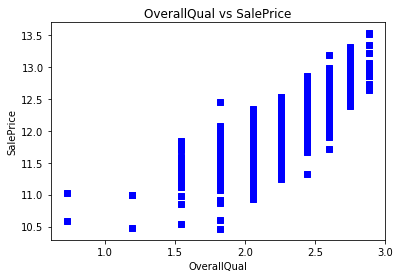

In [28]:
plt.scatter(feature_selection_XY.OverallQual, y_train, c = "blue", marker = "s")
plt.title("OverallQual vs SalePrice")
plt.xlabel("OverallQual")
plt.ylabel("SalePrice")
plt.show()

TotalBath :Total number of bathrooms

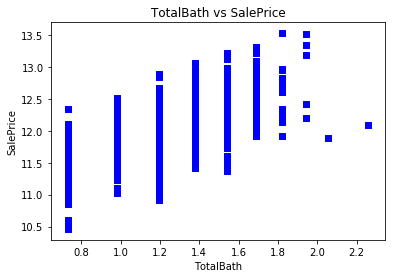

In [29]:
plt.scatter(feature_selection_XY.TotalBath, y_train, c = "blue", marker = "s")
plt.title("TotalBath vs SalePrice")
plt.xlabel("TotalBath")
plt.ylabel("SalePrice")
plt.show()

Let's look deep into these features:<br>
AllSF                = all_data["GrLivArea"] + all_data["TotalBsmtSF"]<br>
OverallQual          :Overall material and finish quality<br>
AllFlrsSF            = all_data["1stFlrSF"] + all_data["2ndFlrSF"]<br>
GrLivArea            = Above grade (ground) living area square feet<br>
SimplOverallQual     <br>
ExterQual            :Exterior material quality<br>
TotalBath            :Total number of bathrooms<br>
KitchenQual          :Kitchen quality<br>
GarageCars           :Size of garage in car capacity<br>
SimplExterQual       <br>
OverallGrade         = all_data["OverallQual"] * all_data["OverallCond"]<br>
1stFlrSF            <br>
SimplKitchenQual    <br>
ExterGrade          <br>
YearBuilt            :Original construction date<br>

We rule out some features with high correlations. And use the rest as the final features.

In [30]:
train = all_data[:ntrain][feature_selection_col]
test = all_data[ntrain:][feature_selection_col]

## Model Evaluation:

We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation.

In [31]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

LASSO Regression :
This model may be very sensitive to outliers. So we need to made it more robust on them. For that we use the sklearn's Robustscaler() method on pipeline

In [32]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

Elastic Net Regression :
again made robust to outliers

In [33]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

Kernel Ridge Regression :

In [34]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

Gradient Boosting Regression :
With huber loss that makes it robust to outliers

In [35]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

XGBoost:

In [36]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

LightGBM :

In [37]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

Let's see how these base models perform on the data by evaluating the cross-validation rmsle error

In [38]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1140 (0.0054)



In [39]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1141 (0.0053)



In [40]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1156 (0.0051)



In [41]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1167 (0.0075)



In [42]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1143 (0.0058)



In [43]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1163 (0.0067)



## Model Ensembling:

Simplest Stacking approach : Averaging base models
We begin with this simple approach of averaging base models. We build a new class to extend scikit-learn with our model and also to laverage encapsulation and code reuse (inheritance)

In [44]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

We just average four models here ENet, GBoost, KRR and lasso. Of course we could easily add more models in the mix.

averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Less simple Stacking : Adding a Meta-model

In this approach, we add a meta-model on averaged base models and use the out-of-folds predictions of these base models to train our meta-model.

The procedure, for the training part, may be described as follows:

1.Split the total training set into two disjoint sets (here train and .holdout )

2.Train several base models on the first part (train)

3.Test these base models on the second part (holdout)

4.Use the predictions from 3) (called out-of-folds predictions) as the inputs, and the correct responses (target variable) as the outputs to train a higher level learner called meta-model.

The first three steps are done iteratively . If we take for example a 5-fold stacking , we first split the training data into 5 folds. Then we will do 5 iterations. In each iteration, we train every base model on 4 folds and predict on the remaining fold (holdout fold).

So, we will be sure, after 5 iterations , that the entire data is used to get out-of-folds predictions that we will then use as new feature to train our meta-model in the step 4.

For the prediction part , We average the predictions of all base models on the test data and used them as meta-features on which, the final prediction is done with the meta-model.

In [45]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

To make the two approaches comparable (by using the same number of models) , we just average Enet KRR and Gboost, then we add lasso as meta-model.

In [46]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1088 (0.0056)


Ensembling StackedRegressor, XGBoost and LightGBM

We add XGBoost and LightGBM to the StackedRegressor defined previously.

We first define a rmsle evaluation function

In [47]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

StackedRegressor:

In [48]:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.07668436230748962


In [49]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07971281394832326


In [50]:
model_lgb.fit(train, y_train)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train, lgb_train_pred))

0.07320429803422897


In [54]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.2 + xgb_train_pred*0.1 + lgb_train_pred*0.7 ))

RMSLE score on train data:
0.07262034999905438


In [55]:
ensemble = stacked_pred*0.2 + xgb_pred*0.1 + lgb_pred*0.7

In [56]:
sub = pd.DataFrame()
sub['Id'] = sample["Id"]
sub['SalePrice'] = ensemble
sub.head(5)

,Id,SalePrice
0,1461,124404.511712
1,1462,160040.347525
2,1463,186004.429185
3,1464,186637.733045
4,1465,187699.591124
